<a href="https://colab.research.google.com/github/Glendatorres/Nubes-Palabras/blob/main/Cantantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy
!python -m spacy download es_core_news_md
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 15.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd

from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import spacy
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
nlp = spacy.load('es_core_news_md')
ruta ='/content/drive/MyDrive/DATASET_CANCIONES.csv'
df = pd.read_csv(ruta)

Cantante BERET

In [7]:
artista_filtrado = df[df['CANTANTE'].str.contains("BERET", case=False, na=False)]
columnas_interes = ['CANTANTE', 'GENERO', 'LETRA CANCION 1', 'LETRA CANCION 2', 'LETRA CANCION 3', 'LETRA CANCION 4', 'LETRA CANCION 5']
artista_filtrado = artista_filtrado[columnas_interes]
artista_filtrado.head()

,CANTANTE,GENERO,LETRA CANCION 1,LETRA CANCION 2,LETRA CANCION 3,LETRA CANCION 4,LETRA CANCION 5
24,BERET,POP,Aún me amas\nDime a cuantos más con las mismas...,Tú siempre decías que nunca te irías\nSi no te...,Cuando ya no sepas dónde ir\nSolo vete donde d...,"Me vas a ver\nReírme, feliz, y viviendo bien\n...",Algo me dice que te escuche pero sé como vas a...


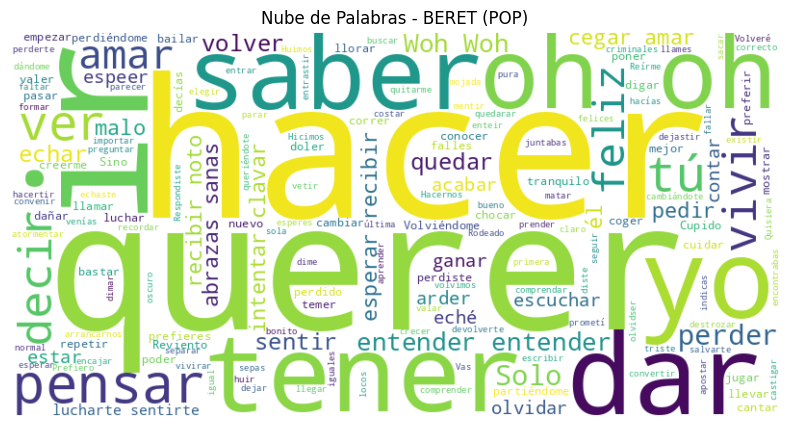

In [8]:
def generar_nube(canciones, artista, genero):
    verbos = []
    adjetivos = []
    localizaciones = []
    personas = []
    organizaciones = []

    for index, row in canciones.iterrows():
        for col in ['LETRA CANCION 1', 'LETRA CANCION 2', 'LETRA CANCION 3', 'LETRA CANCION 4', 'LETRA CANCION 5']:
            if pd.notna(row[col]):  # Verifica que la letra no sea NaN
                cancion = nlp(row[col])
                for token in cancion:
                    if token.pos_ == "VERB":
                        verbos.append(token.lemma_)
                    elif token.pos_ == "ADJ":
                        adjetivos.append(token.text)
                for entity in cancion.ents:
                    if entity.label_ == "LOC":
                        localizaciones.append(entity.text)
                    elif entity.label_ == "PER":
                        personas.append(entity.text)
                    elif entity.label_ == "ORG":
                        organizaciones.append(entity.text)

    # Generar texto para la nube de palabras
    texto = " ".join(verbos + adjetivos + localizaciones + personas + organizaciones)

    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de Palabras - {artista} ({genero})")
    plt.show()

# Generar la nube de palabras para BERET
generar_nube(artista_filtrado, "BERET", artista_filtrado['GENERO'].iloc[0])

Analisis de beret
Dentro de todas las palabras beret es un artista que se a identificado por ser muy emocional en sus letras, los verbos mas representativos son querer, tener, saber, hacer decir, que coinciden en sus cinco canciones , también expresa sus propios pensamientos a cerca de las relaciones.

<Figure size 640x480 with 0 Axes>

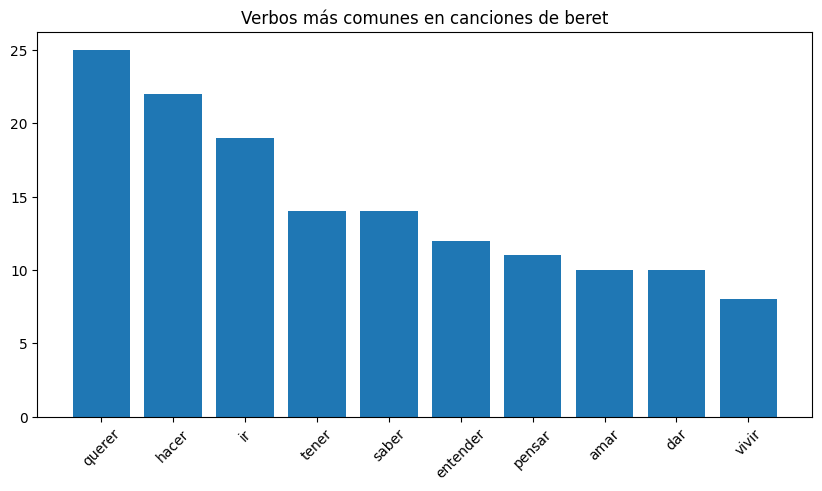

<Figure size 640x480 with 0 Axes>

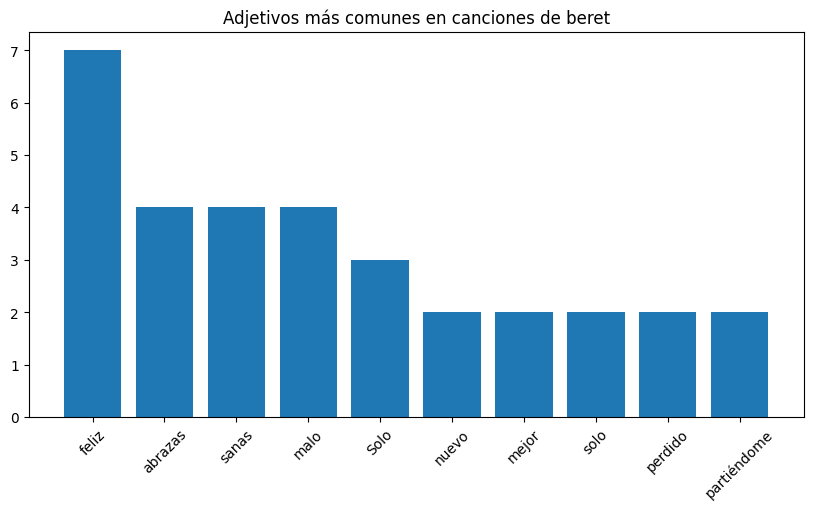

<Figure size 640x480 with 0 Axes>

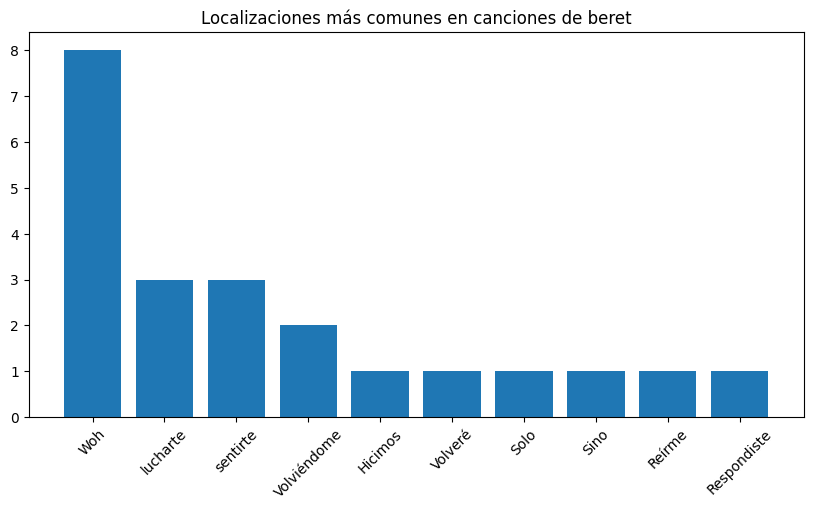

<Figure size 640x480 with 0 Axes>

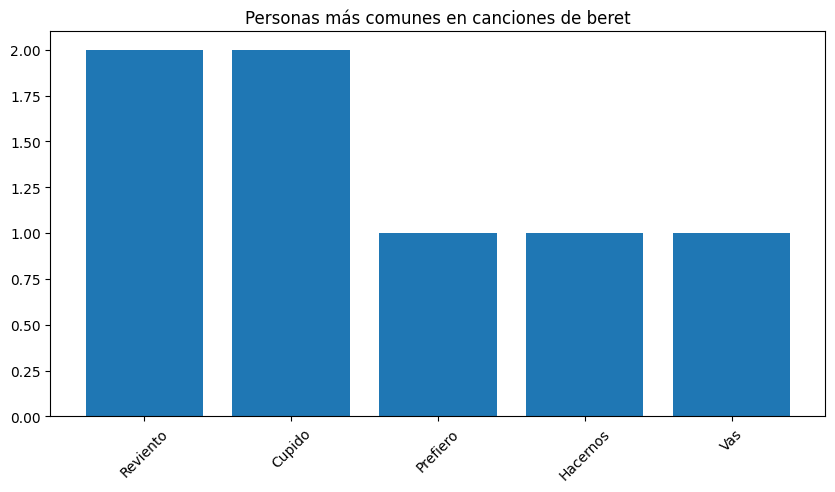

<Figure size 640x480 with 0 Axes>

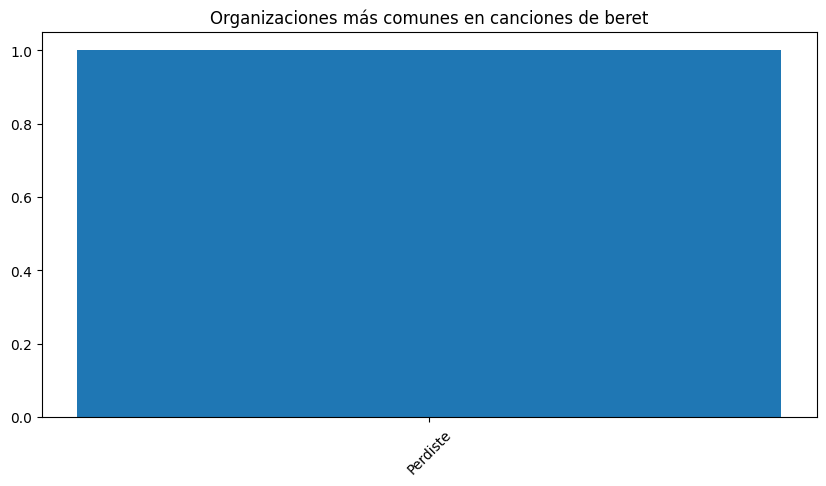

In [10]:
def calcular_frecuencia_palabras(canciones):
    verbos = []
    adjetivos = []
    localizaciones = []
    personas = []
    organizaciones = []

    for index, row in canciones.iterrows():
        for col in ['LETRA CANCION 1', 'LETRA CANCION 2', 'LETRA CANCION 3', 'LETRA CANCION 4', 'LETRA CANCION 5']:
            if pd.notna(row[col]):  # Verifica que la letra no sea NaN
                cancion = nlp(row[col])
                for token in cancion:
                    if token.pos_ == "VERB":
                        verbos.append(token.lemma_)
                    elif token.pos_ == "ADJ":
                        adjetivos.append(token.text)
                for entity in cancion.ents:
                    if entity.label_ == "LOC":
                        localizaciones.append(entity.text)
                    elif entity.label_ == "PER":
                        personas.append(entity.text)
                    elif entity.label_ == "ORG":
                        organizaciones.append(entity.text)

    # Calcular frecuencias
    frecuencia_verbos = Counter(verbos)
    frecuencia_adjetivos = Counter(adjetivos)
    frecuencia_localizaciones = Counter(localizaciones)
    frecuencia_personas = Counter(personas)
    frecuencia_organizaciones = Counter(organizaciones)

    return frecuencia_verbos, frecuencia_adjetivos, frecuencia_localizaciones, frecuencia_personas, frecuencia_organizaciones

# Calcular frecuencias
frecuencia_verbos_beret, frecuencia_adjetivos_beret, frecuencia_localizaciones_beret, frecuencia_personas_beret, frecuencia_organizaciones_beret = calcular_frecuencia_palabras(artista_filtrado)

# Función para graficar las frecuencias
def graficar_frecuencias(frecuencia, titulo):
    palabras, frecuencias = zip(*frecuencia.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(palabras, frecuencias)
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.show()
# Graficar frecuencias para Feid
plt.figure()
graficar_frecuencias(frecuencia_verbos_beret, "Verbos más comunes en canciones de beret")
plt.figure()
graficar_frecuencias(frecuencia_adjetivos_beret, "Adjetivos más comunes en canciones de beret")
plt.figure()
graficar_frecuencias(frecuencia_localizaciones_beret, "Localizaciones más comunes en canciones de beret")
plt.figure()
graficar_frecuencias(frecuencia_personas_beret, "Personas más comunes en canciones de beret")
plt.figure()
graficar_frecuencias(frecuencia_organizaciones_beret, "Organizaciones más comunes en canciones de beret")

Analisis Gráfico
Beret se centra en temas emocionales y existenciales, explorando el amor, la pérdida, y la introspección personal, con un énfasis en las relaciones y las decisiones cotidianas que todos lo seres humanos tenemos. Estos temas son comunes en el género pop y contribuyen a la conexión emocional que sus canciones pueden generar con el público y mayormente a sus fans.

en este grafico se muestra eque en las dos primeras querer y feliz son con mayor relevancia es correlativo por el amor.

In [11]:
artista_filtrado = df[df['CANTANTE'].str.contains("MORAT", case=False, na=False)]
columnas_interes = ['CANTANTE', 'GENERO', 'LETRA CANCION 1', 'LETRA CANCION 2', 'LETRA CANCION 3', 'LETRA CANCION 4', 'LETRA CANCION 5']
artista_filtrado = artista_filtrado[columnas_interes]
artista_filtrado.head()

,CANTANTE,GENERO,LETRA CANCION 1,LETRA CANCION 2,LETRA CANCION 3,LETRA CANCION 4,LETRA CANCION 5
25,MORAT,POP,¿Quién te dijo esa mentira?\nQue eras fácil de...,Quiero confesarte que ya tengo la certeza\nDe ...,Recuerdo verte de perfil\nPerdona si no fui su...,Tú sigues siendo la prueba\nDe que hay victori...,Yeh-yeh\nTu voz me deja como bajo cero\nCuando...


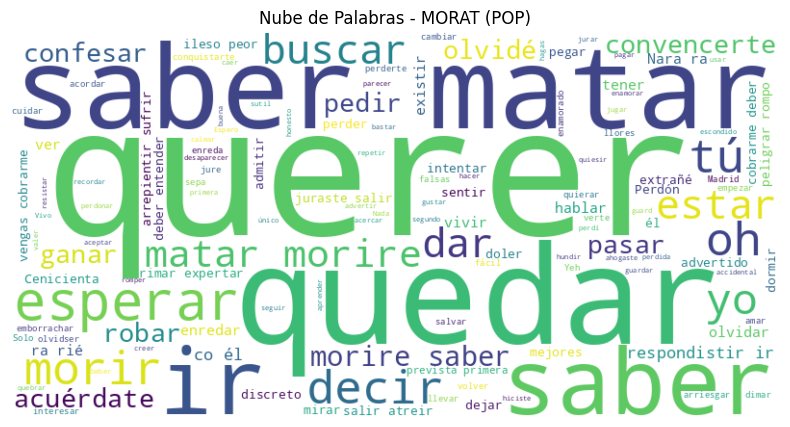

In [12]:
def generar_nube(canciones, artista, genero):
    verbos = []
    adjetivos = []
    localizaciones = []
    personas = []
    organizaciones = []

    for index, row in canciones.iterrows():
        for col in ['LETRA CANCION 1', 'LETRA CANCION 2', 'LETRA CANCION 3', 'LETRA CANCION 4', 'LETRA CANCION 5']:
            if pd.notna(row[col]):  # Verifica que la letra no sea NaN
                cancion = nlp(row[col])
                for token in cancion:
                    if token.pos_ == "VERB":
                        verbos.append(token.lemma_)
                    elif token.pos_ == "ADJ":
                        adjetivos.append(token.text)
                for entity in cancion.ents:
                    if entity.label_ == "LOC":
                        localizaciones.append(entity.text)
                    elif entity.label_ == "PER":
                        personas.append(entity.text)
                    elif entity.label_ == "ORG":
                        organizaciones.append(entity.text)

    # Generar texto para la nube de palabras
    texto = " ".join(verbos + adjetivos + localizaciones + personas + organizaciones)

    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de Palabras - {artista} ({genero})")
    plt.show()

# Generar la nube de palabras para MORAT
generar_nube(artista_filtrado, "MORAT", artista_filtrado['GENERO'].iloc[0])

Analisis Morat revela aspectos significativos sobre la identidad artística de la banda y los temas recurrentes en su música. A través de un análisis de estas palabras, podemos explorar cómo el grupo se conecta con sus fans. Una de las palabras más destacadas en la nube es "querer", lo que sugiere que el deseo, tanto en el contexto de relaciones amorosas como en otros aspectos de la vida, es un tema central en la música de Morat. Esta palabra, que aparece junto a "saber", "matar", "esperar", y "quedar", indica una narrativa de sus canciones  gira en torno al anhelo de afecto, la incertidumbre en las relaciones, y las complejidades emocionales que estas implican en las personas diariamente.

<Figure size 640x480 with 0 Axes>

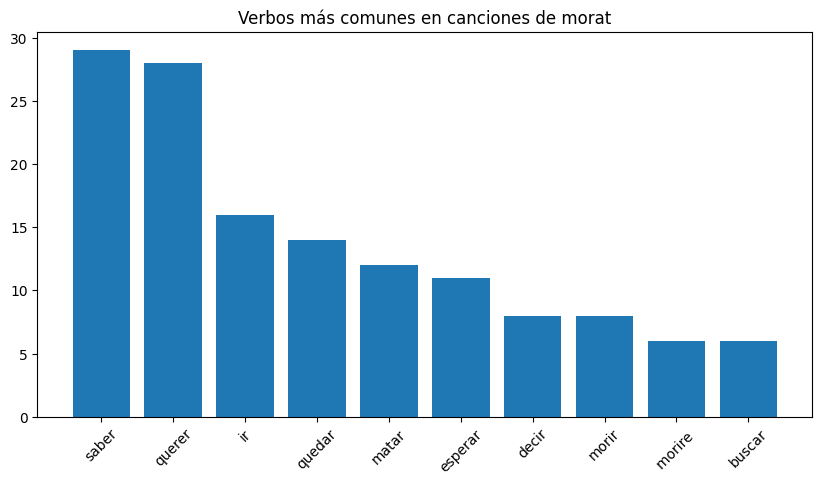

<Figure size 640x480 with 0 Axes>

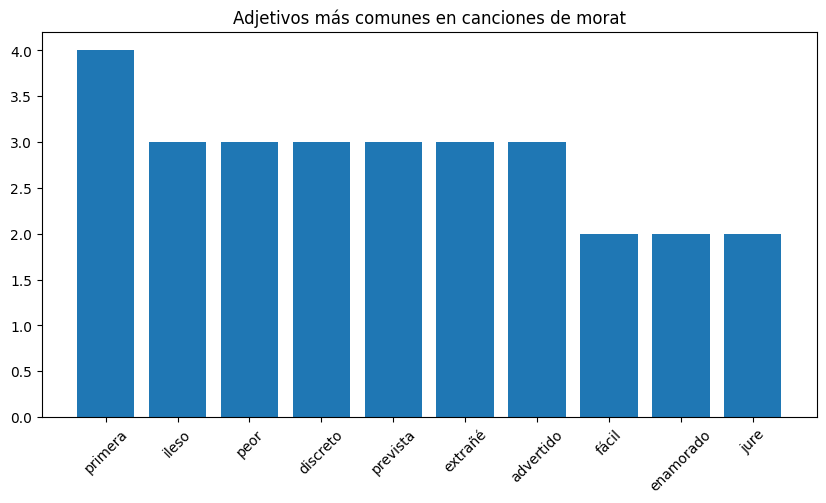

<Figure size 640x480 with 0 Axes>

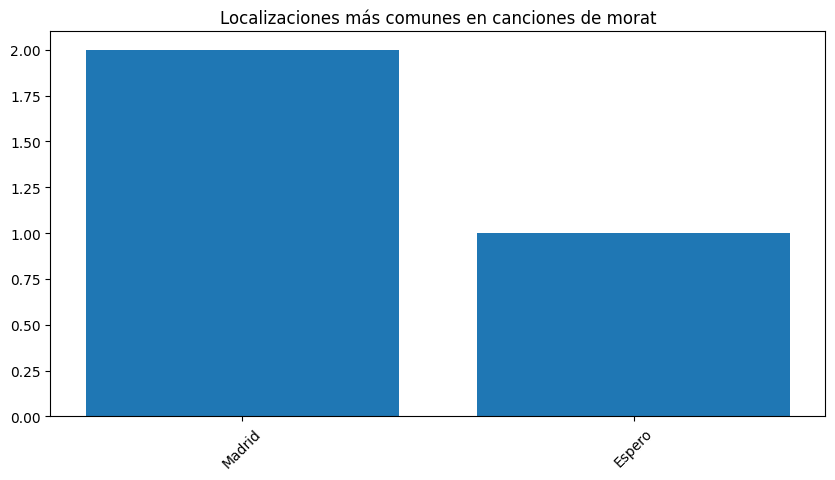

<Figure size 640x480 with 0 Axes>

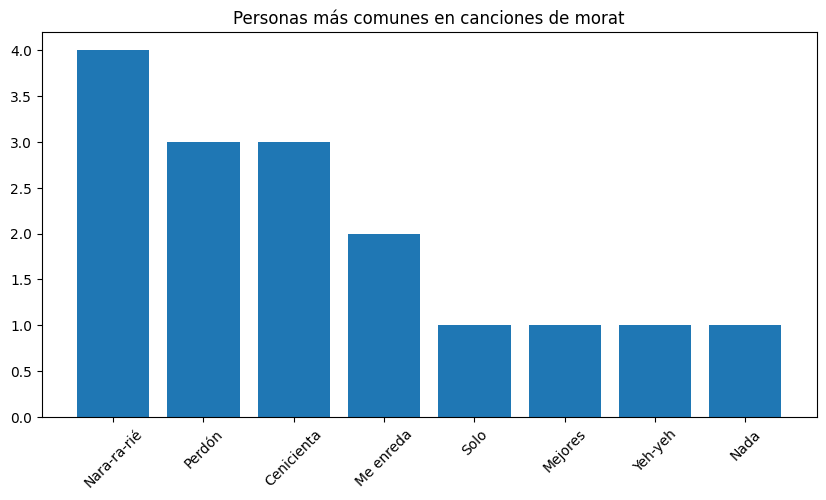

No hay datos para graficar en: Organizaciones más comunes en canciones de morat


<Figure size 640x480 with 0 Axes>

In [15]:
def calcular_frecuencia_palabras(canciones):
    verbos = []
    adjetivos = []
    localizaciones = []
    personas = []
    organizaciones = []

    for index, row in canciones.iterrows():
        for col in ['LETRA CANCION 1', 'LETRA CANCION 2', 'LETRA CANCION 3', 'LETRA CANCION 4', 'LETRA CANCION 5']:
            if pd.notna(row[col]):  # Verifica que la letra no sea NaN
                cancion = nlp(row[col])
                for token in cancion:
                    if token.pos_ == "VERB":
                        verbos.append(token.lemma_)
                    elif token.pos_ == "ADJ":
                        adjetivos.append(token.text)
                for entity in cancion.ents:
                    if entity.label_ == "LOC":
                        localizaciones.append(entity.text)
                    elif entity.label_ == "PER":
                        personas.append(entity.text)
                    elif entity.label_ == "ORG":
                        organizaciones.append(entity.text)

    # Calcular frecuencias
    frecuencia_verbos = Counter(verbos)
    frecuencia_adjetivos = Counter(adjetivos)
    frecuencia_localizaciones = Counter(localizaciones)
    frecuencia_personas = Counter(personas)
    frecuencia_organizaciones = Counter(organizaciones)

    return frecuencia_verbos, frecuencia_adjetivos, frecuencia_localizaciones, frecuencia_personas, frecuencia_organizaciones

# Calcular frecuencias
frecuencia_verbos_morat, frecuencia_adjetivos_morat, frecuencia_localizaciones_morat, frecuencia_personas_morat, frecuencia_organizaciones_morat = calcular_frecuencia_palabras(artista_filtrado)

# Función para graficar las frecuencias
def graficar_frecuencias(frecuencia, titulo):

    # Handle the case when there are no items to plot
    if not frecuencia:
        print(f"No hay datos para graficar en: {titulo}")
        return

    palabras, frecuencias = zip(*frecuencia.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(palabras, frecuencias)
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.show()
# Graficar frecuencias para Feid
plt.figure()
graficar_frecuencias(frecuencia_verbos_morat, "Verbos más comunes en canciones de morat")
plt.figure()
graficar_frecuencias(frecuencia_adjetivos_morat, "Adjetivos más comunes en canciones de morat")
plt.figure()
graficar_frecuencias(frecuencia_localizaciones_morat, "Localizaciones más comunes en canciones de morat")
plt.figure()
graficar_frecuencias(frecuencia_personas_morat, "Personas más comunes en canciones de morat")
plt.figure()
graficar_frecuencias(frecuencia_organizaciones_morat, "Organizaciones más comunes en canciones de morat")

Análisis Gráfico